In [1]:

from types import CodeType
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib   # v 0.7.2

figs_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/figs/"
inv_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/"
gti_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNminGTI/"
ghi_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/"

#location = pvlib.location.Location(-27.430891, -48.441406, tz = 'Etc/GMT', altitude= 2.74, name = 'Florianopolis')  # check for daylight savings 'Etc/GMT-3' 'Brazil/East' 'America/Sao_Paulo'

tzBRA = 'Etc/GMT+3'
tzETC = 'Etc/GMT-0'
                   
dcac = ['P_in1', 
        'P_grid',
        'I_in1']

GHIsensor = ['GHIP_SMP11',
             'F_GHIP_SMP11']

GTIsensor = ['TGIP_SMP11_VENT',
             'F_TGIP_SMP11_VENT']

In [2]:
dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)
dfCDT = dfCDT.drop_duplicates(subset=['TIMESTAMP'])
dfCDT = dfCDT.set_index('TIMESTAMP')
#dfCDT = dfCDT.index.drop_duplicates()
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTnosync.index = dfCDTnosync.index.tz_localize(tzBRA)
dfCDTnosync.index = dfCDTnosync.index.tz_convert(tzETC)
dfCDTsync = dfCDT[dfCDT.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTsync.index = dfCDTsync.index.tz_localize(tzETC)
dfCDTsync = [dfCDTnosync, dfCDTsync]
dfCDTsync = pd.concat(dfCDTsync)
dfPCDT = dfCDTsync[dcac]
dfPCDT = dfPCDT.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDT = dfPCDT.rename(columns={"P_in1": "Pdccdt", "I_in1": "Idccdt", "P_grid": "Paccdt"})
dfPCDT.shape

dfCDTA  = pd.read_csv(inv_path + 'CDTA.csv') 
dfCDTA['TIMESTAMP'] = dfCDTA['TIMESTAMP'].astype(np.datetime64)
dfCDTA = dfCDTA.drop_duplicates(subset=['TIMESTAMP'])
dfCDTA = dfCDTA.set_index('TIMESTAMP')
dfCDTAnosync = dfCDTA[dfCDTA.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTAnosync.index = dfCDTAnosync.index.tz_localize(tzBRA)
dfCDTAnosync.index = dfCDTAnosync.index.tz_convert(tzETC)
dfCDTAsync = dfCDTA[dfCDTA.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTAsync.index = dfCDTAsync.index.tz_localize(tzETC)
dfCDTAsync = [dfCDTAnosync, dfCDTAsync]
dfCDTAsync = pd.concat(dfCDTAsync)
dfPCDTA = dfCDTAsync[dcac]
dfPCDTA = dfPCDTA.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDTA = dfPCDTA.rename(columns={"P_in1": "Pdccdta", "I_in1": "Idccdta","P_grid": "Paccdta"})
dfPCDTA.shape



dfPSI  = pd.read_csv(inv_path + 'PSI.csv') 
dfPSI['TIMESTAMP'] = dfPSI['TIMESTAMP'].astype(np.datetime64)
dfPSI = dfPSI.drop_duplicates(subset=['TIMESTAMP'])
dfPSI = dfPSI.set_index('TIMESTAMP')
#dfPSI = dfPSI.index.drop_duplicates()
dfPSInosync = dfPSI[dfPSI.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfPSInosync.index = dfPSInosync.index.tz_localize(tzBRA)
dfPSInosync.index = dfPSInosync.index.tz_convert(tzETC)
dfPSIsync = dfPSI[dfPSI.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfPSIsync.index = dfPSIsync.index.tz_localize(tzETC)
dfPSIsync = [dfPSInosync, dfPSIsync]
dfPSIsync = pd.concat(dfPSIsync)
dfPPSI = dfPSIsync[dcac]
dfPPSI = dfPPSI.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPPSI = dfPPSI.rename(columns={"P_in1": "Pdcpsi", "I_in1": "Idcpsi","P_grid": "Pacpsi"})
dfPPSI.shape



pvsi = pd.merge(dfPCDT,dfPCDTA, how = 'left',left_index = True, right_index = True)
pvsi = pd.merge(pvsi,dfPPSI, how = 'left',left_index = True, right_index = True)

In [3]:
dfgti19 = pd.read_pickle(gti_path + '2019' +'gtiFLAG.pkl')
dfgti20 = pd.read_pickle(gti_path + '2020' +'gtiFLAG.pkl')
dfgtis = [dfgti19[GTIsensor], dfgti20[GTIsensor]]
dfgtis = pd.concat(dfgtis)
#dfgtis = dfgtis[dfgtis.F_TGIP_SMP11_VENT < 4]

dfghi19 = pd.read_pickle(ghi_path + '2019' +'ghiFLAG.pkl')
dfghi20 = pd.read_pickle(ghi_path + '2020' +'ghiFLAG.pkl')
dfghis = [dfghi19[GHIsensor], dfghi20[GHIsensor]]
dfghis = pd.concat(dfghis)
#dfghis = dfghis[dfghis.F_GHIP_SMP11 < 4]


dfirad = pd.merge(dfgtis,dfghis, how = 'inner',left_index = True, right_index = True)

pxir = pd.merge(pvsi,dfirad, how = 'inner',left_index = True, right_index = True)

In [4]:
pxir

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11
2019-01-02 22:58:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.700000,0,-2.800000,1
2019-01-02 22:59:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.700000,0,-2.800000,1
2019-01-02 23:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.721667,0,-2.800000,1
2019-01-02 23:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.800000,0,-2.800000,1
2019-01-02 23:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.800000,0,-2.861667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.770000,3
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.776667,3
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.103333,0,-4.793333,3
2020-12-31 23:58:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.800000,3


In [5]:
pxirb = pxir

In [7]:
dfshiftb = pd.DataFrame(columns = ['Pdccdta', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftb['Pdccdt'] = pxirb['Pdccdt']
dfshiftb['ghi']=pxirb['GHIP_SMP11']
dfshiftb.loc[:,'ghi1']= dfshiftb.ghi.shift(1)
dfshiftb.loc[:,'ghi2']= dfshiftb.ghi.shift(2)
dfshiftb.loc[:,'ghi3']= dfshiftb.ghi.shift(3)
dfshiftb.loc[:,'ghi4']= dfshiftb.ghi.shift(4)
dfshiftb.loc[:,'ghi5']= dfshiftb.ghi.shift(5)
dfshiftb.loc[:,'ghi-1']= dfshiftb.ghi.shift(-1)
dfshiftb.loc[:,'ghi-2']= dfshiftb.ghi.shift(-2)
dfshiftb.loc[:,'ghi-3']= dfshiftb.ghi.shift(-3)
dfshiftb.loc[:,'ghi-4']= dfshiftb.ghi.shift(-4)
dfshiftb.loc[:,'ghi-5']= dfshiftb.ghi.shift(-5)
dfshiftb.corr()

dfshiftAb = pd.DataFrame(columns = ['Pdccdta', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftAb['Pdccdta'] = pxirb['Pdccdta']
dfshiftAb['ghi']= pxirb['GHIP_SMP11']
dfshiftAb.loc[:,'ghi1']= dfshiftAb.ghi.shift(1)
dfshiftAb.loc[:,'ghi2']= dfshiftAb.ghi.shift(2)
dfshiftAb.loc[:,'ghi3']= dfshiftAb.ghi.shift(3)
dfshiftAb.loc[:,'ghi4']= dfshiftAb.ghi.shift(3)
dfshiftAb.loc[:,'ghi5']= dfshiftAb.ghi.shift(3)
dfshiftAb.loc[:,'ghi-1']= dfshiftAb.ghi.shift(-1)
dfshiftAb.loc[:,'ghi-2']= dfshiftAb.ghi.shift(-2)
dfshiftAb.loc[:,'ghi-3']= dfshiftAb.ghi.shift(-3)
dfshiftAb.loc[:,'ghi-4']= dfshiftAb.ghi.shift(-3)
dfshiftAb.loc[:,'ghi-5']= dfshiftAb.ghi.shift(-3)

dfshiftpsib = pd.DataFrame(columns = ['Pdcpsi', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftpsib['Pdcpsi'] = pxirb['Pdcpsi']
dfshiftpsib['ghi']=pxirb['GHIP_SMP11']
dfshiftpsib.loc[:,'ghi1']= dfshiftpsib.ghi.shift(1)
dfshiftpsib.loc[:,'ghi2']= dfshiftpsib.ghi.shift(2)
dfshiftpsib.loc[:,'ghi3']= dfshiftpsib.ghi.shift(3)
dfshiftpsib.loc[:,'ghi4']= dfshiftpsib.ghi.shift(4)
dfshiftpsib.loc[:,'ghi5']= dfshiftpsib.ghi.shift(5)
dfshiftpsib.loc[:,'ghi-1']= dfshiftpsib.ghi.shift(-1)
dfshiftpsib.loc[:,'ghi-2']= dfshiftpsib.ghi.shift(-2)
dfshiftpsib.loc[:,'ghi-3']= dfshiftpsib.ghi.shift(-3)
dfshiftpsib.loc[:,'ghi-4']= dfshiftpsib.ghi.shift(-4)
dfshiftpsib.loc[:,'ghi-5']= dfshiftpsib.ghi.shift(-5)

C1b = dfshiftb.corr()
C1b = C1b.iloc[0,:]
C1b = C1b.iloc[1:12]
C1b.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


C2b = dfshiftAb.corr()
C2b = C2b.iloc[0,:]
C2b = C2b.iloc[1:12]
C2b.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

C3b = dfshiftpsib.corr()
C3b = C3b.iloc[0,:]
C3b = C3b.iloc[1:12]
C3b.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

Text(0.5, 1.0, 'SMP11 - 2019 - 2020')

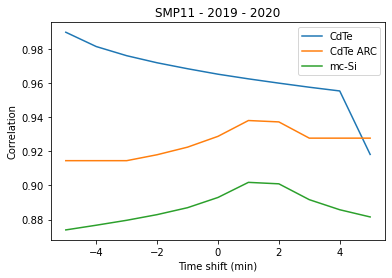

In [9]:
f1 = C1b.plot(label = 'CdTe')
f2 = C2b.plot(label = 'CdTe ARC')
f3 = C3b.plot(label = 'mc-Si')
plt.xlabel("Time shift (min)")
plt.ylabel("Correlation")
plt.legend(loc = 'best')
plt.title('SMP11 - 2019 - 2020')

In [10]:
C1b

-5    0.989914
-4    0.981522
-3    0.976150
-2    0.971991
-1    0.968501
 0    0.965291
 1    0.962561
 2    0.960046
 3    0.957650
 4    0.955456
 5    0.918203
Name: ghi-5, dtype: float64

In [17]:
C1b

-5    0.984242
-4    0.971779
-3    0.964997
-2    0.960551
-1    0.956755
 0    0.952480
 1    0.949108
 2    0.946382
 3    0.944048
 4    0.942007
 5    0.893516
Name: ghi-5, dtype: float64

In [11]:
C2b

-5    0.914540
-4    0.914540
-3    0.914540
-2    0.918020
-1    0.922476
 0    0.928819
 1    0.938100
 2    0.937291
 3    0.927758
 4    0.927758
 5    0.927758
Name: Pdccdta, dtype: float64

In [12]:
C3b

-5    0.873900
-4    0.876656
-3    0.879549
-2    0.882871
-1    0.886947
 0    0.892949
 1    0.901808
 2    0.900952
 3    0.891653
 4    0.885744
 5    0.881510
Name: Pdcpsi, dtype: float64

In [15]:
GHIsensor2 = ['GHIP_SI02pt100',
             'F_GHIP_SI02pt100']


dfghi19b = pd.read_pickle(ghi_path + '2019' +'ghiFLAG.pkl')
dfghi20b = pd.read_pickle(ghi_path + '2020' +'ghiFLAG.pkl')
dfghisb = [dfghi19b[GHIsensor2], dfghi20b[GHIsensor2]]
dfghisb = pd.concat(dfghisb)       
dfghisb.index.drop_duplicates()
#dfiradb = pd.merge(dfghisb, how = 'left',left_index = True, right_index = True)
pxirb = pd.merge(pvsi,dfghisb, how = 'left',left_index = True, right_index = True)


dfshiftb = pd.DataFrame(columns = ['Pdccdta', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftb['Pdccdt'] = pxirb['Pdccdt']
dfshiftb['ghi']=pxirb['GHIP_SI02pt100']
dfshiftb.loc[:,'ghi1']= dfshiftb.ghi.shift(1)
dfshiftb.loc[:,'ghi2']= dfshiftb.ghi.shift(2)
dfshiftb.loc[:,'ghi3']= dfshiftb.ghi.shift(3)
dfshiftb.loc[:,'ghi4']= dfshiftb.ghi.shift(4)
dfshiftb.loc[:,'ghi5']= dfshiftb.ghi.shift(5)
dfshiftb.loc[:,'ghi-1']= dfshiftb.ghi.shift(-1)
dfshiftb.loc[:,'ghi-2']= dfshiftb.ghi.shift(-2)
dfshiftb.loc[:,'ghi-3']= dfshiftb.ghi.shift(-3)
dfshiftb.loc[:,'ghi-4']= dfshiftb.ghi.shift(-4)
dfshiftb.loc[:,'ghi-5']= dfshiftb.ghi.shift(-5)
dfshiftb.corr()

dfshiftAb = pd.DataFrame(columns = ['Pdccdta', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftAb['Pdccdta'] = pxirb['Pdccdta']
dfshiftAb['ghi']= pxirb['GHIP_SI02pt100']
dfshiftAb.loc[:,'ghi1']= dfshiftAb.ghi.shift(1)
dfshiftAb.loc[:,'ghi2']= dfshiftAb.ghi.shift(2)
dfshiftAb.loc[:,'ghi3']= dfshiftAb.ghi.shift(3)
dfshiftAb.loc[:,'ghi4']= dfshiftAb.ghi.shift(3)
dfshiftAb.loc[:,'ghi5']= dfshiftAb.ghi.shift(3)
dfshiftAb.loc[:,'ghi-1']= dfshiftAb.ghi.shift(-1)
dfshiftAb.loc[:,'ghi-2']= dfshiftAb.ghi.shift(-2)
dfshiftAb.loc[:,'ghi-3']= dfshiftAb.ghi.shift(-3)
dfshiftAb.loc[:,'ghi-4']= dfshiftAb.ghi.shift(-3)
dfshiftAb.loc[:,'ghi-5']= dfshiftAb.ghi.shift(-3)

dfshiftpsib = pd.DataFrame(columns = ['Pdcpsi', 'ghi-5','ghi-4', 'ghi-3','ghi-2','ghi-1', 'ghi', 'ghi1','ghi2', 'ghi3','ghi4','ghi5'])
dfshiftpsib['Pdcpsi'] = pxirb['Pdcpsi']
dfshiftpsib['ghi']=pxirb['GHIP_SI02pt100']
dfshiftpsib.loc[:,'ghi1']= dfshiftpsib.ghi.shift(1)
dfshiftpsib.loc[:,'ghi2']= dfshiftpsib.ghi.shift(2)
dfshiftpsib.loc[:,'ghi3']= dfshiftpsib.ghi.shift(3)
dfshiftpsib.loc[:,'ghi4']= dfshiftpsib.ghi.shift(4)
dfshiftpsib.loc[:,'ghi5']= dfshiftpsib.ghi.shift(5)
dfshiftpsib.loc[:,'ghi-1']= dfshiftpsib.ghi.shift(-1)
dfshiftpsib.loc[:,'ghi-2']= dfshiftpsib.ghi.shift(-2)
dfshiftpsib.loc[:,'ghi-3']= dfshiftpsib.ghi.shift(-3)
dfshiftpsib.loc[:,'ghi-4']= dfshiftpsib.ghi.shift(-4)
dfshiftpsib.loc[:,'ghi-5']= dfshiftpsib.ghi.shift(-5)

C1b = dfshiftb.corr()
C1b = C1b.iloc[0,:]
C1b = C1b.iloc[1:12]
C1b.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


C2b = dfshiftAb.corr()
C2b = C2b.iloc[0,:]
C2b = C2b.iloc[1:12]
C2b.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

C3b = dfshiftpsib.corr()
C3b = C3b.iloc[0,:]
C3b = C3b.iloc[1:12]
C3b.index = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


Text(0.5, 1.0, 'SiO2PT100 - 2019 - 2020')

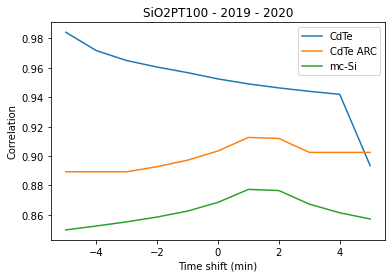

In [16]:
f1 = C1b.plot(label = 'CdTe')
f2 = C2b.plot(label = 'CdTe ARC')
f3 = C3b.plot(label = 'mc-Si')
plt.xlabel("Time shift (min)")
plt.ylabel("Correlation")
plt.legend(loc = 'best')
plt.title('SiO2PT100 - 2019 - 2020')